In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

In [2]:
"""
class 0 = legitimate
class 1 = phishing
"""

'\nclass 0 = legitimate\nclass 1 = phishing\n'

In [3]:
"""
    Read and format dataset to fit into CNN model shape (91 features)
"""
df_2 = pd.read_csv('dataset/new/dataset.csv')

df_2.phishing = df_2.phishing * 1

df_2.ssl = df_2.ssl * 1

df_2 = df_2.astype(float)
X = df_2.drop('phishing', axis=1)
y = df_2['phishing']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
_X_train=X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
_X_test=X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(64, 2, activation="relu", input_shape=(X.shape[1],1)))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.MaxPooling1D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation = 'softmax'))
model.summary()
model.compile(keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy','mse'])
history = model.fit(_X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_split=0.2, shuffle=True)
test_loss, test_acc,mse = model.evaluate(_X_test,  y_test, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 90, 64)            192       
_________________________________________________________________
dense (Dense)                (None, 90, 16)            1040      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 45, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1442      
Total params: 2,674
Trainable params: 2,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 0s 11ms/step - loss: 34.9248 - accuracy: 0.5884 - mse: 0.4698 - val

20/20 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.8326 - mse: 0.4264 - val_loss: 0.5691 - val_accuracy: 0.7563 - val_mse: 0.4284
Epoch 43/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3215 - accuracy: 0.7966 - mse: 0.4449 - val_loss: 3.6813 - val_accuracy: 0.7312 - val_mse: 0.4700
Epoch 44/100
20/20 [==============================] - 0s 3ms/step - loss: 2.3402 - accuracy: 0.7277 - mse: 0.4543 - val_loss: 1.9200 - val_accuracy: 0.7188 - val_mse: 0.4805
Epoch 45/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0864 - accuracy: 0.7872 - mse: 0.4530 - val_loss: 1.7734 - val_accuracy: 0.7750 - val_mse: 0.4481
Epoch 46/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.8138 - mse: 0.4414 - val_loss: 1.2606 - val_accuracy: 0.7625 - val_mse: 0.4487
Epoch 47/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.8216 - mse: 0.4347 - val_loss: 1.2101 - val_accu

20/20 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.8654 - mse: 0.4324 - val_loss: 0.5469 - val_accuracy: 0.8813 - val_mse: 0.4303
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.8858 - mse: 0.4327 - val_loss: 0.3372 - val_accuracy: 0.8375 - val_mse: 0.4255
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8873 - mse: 0.4262 - val_loss: 0.4040 - val_accuracy: 0.8500 - val_mse: 0.4267
Epoch 92/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.8685 - mse: 0.4336 - val_loss: 0.9253 - val_accuracy: 0.7875 - val_mse: 0.4427
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4694 - accuracy: 0.8654 - mse: 0.4382 - val_loss: 0.5784 - val_accuracy: 0.8000 - val_mse: 0.4416
Epoch 94/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.8513 - mse: 0.4315 - val_loss: 0.3180 - val_accu

In [7]:
print('Test accuracy:', test_acc)
print('Test mse:', mse)

Test accuracy: 0.9049999713897705
Test mse: 0.41021960973739624


In [8]:
pred = model.predict(_X_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(y_test, predicted)
print(report)

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90        94
         1.0       0.91      0.91      0.91       106

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



Text(0.5, 0, 'epoch')

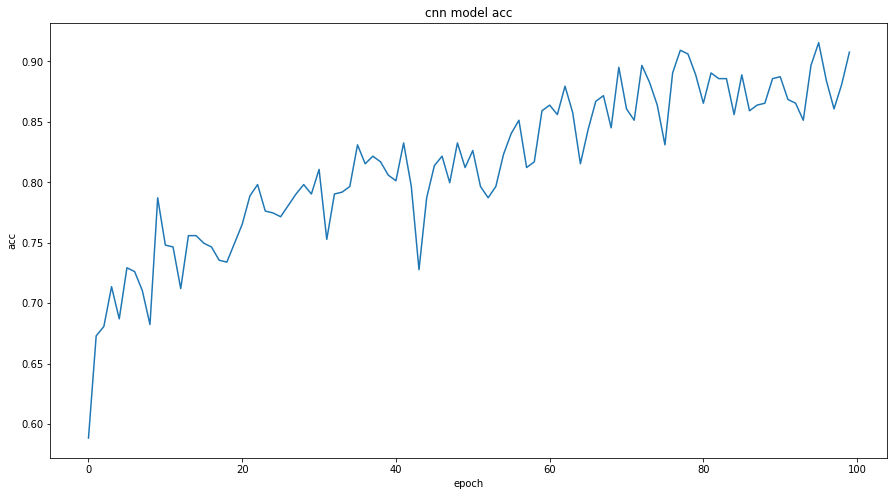

In [9]:
figure = plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'])
plt.title('cnn model acc')
plt.ylabel('acc')
plt.xlabel('epoch')

# Save Model To Disk

In [10]:
model.save("url_phishing.h5")

# Tests

In [33]:
data = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 24.0, 1.0, 0.0, 0.0, 0.0, 8.0, 24.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 20.0, 1, 1.270941, 0, 74.0, 1548.0, 277.0, 2.0, 3.0, 1.0, 28.0, 1, 0.0, 0.0, 0.0]

In [35]:
data = [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 1.0, 2.0, 0.0, 0.0, 2.0, 9.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 20.0, 1, 0.727444, 1, 74.0, 0, 0, 1.0, 2.0, 1.0, 1110.0, 0, 0.0, 0.0, 0.0]

In [37]:
data = [[2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 4.0, 0, 0, 0, 0.0, 0, 0, 6.0, 6.0, 0.0, 14379.0, 1.0, 0, 0.0, 0.0]]

In [39]:
data = [2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0,1.0,0.0,0.0,0.0,11.0,25.0,0,0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.0,1,1.760227,0,74.0,0,0,1.0,2.0,1.0,85728.0,0,1.0,0.0,0.0]

In [41]:
data = [3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,2.0,0.0,0.0,0.0,6.0,24.0,0,0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.0,1,3.748484,0,74.0,0,0,1.0,2.0,1.0,45.0,1,0.0,0.0,0.0]

In [31]:
def predict(data):
    return np.round(model.predict(np.array([np.array([data]).reshape((91,1))])))

In [42]:
list(list(predict(data))[0])

[0.0, 1.0]